<a href="https://colab.research.google.com/github/ompug/ML-Intro-Project-using-CIFAR-10-dataset/blob/main/ML_Intro_Project_Part_1_Hariom_Pughat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Hariom Pughat

ID: 1462984

Class: CS130 Introduction to Artificial Intelligence


### **Project Part 1: Design a Neural Network for Image Classification**
Objective: Design and implement a Convolutional Neural Network (CNN) for image classification
using the CIFAR-10 dataset.

###**How did I learn?**

*   Main - Youtube: [Image classification using CNN (CIFAR10 dataset) | Deep Learning Tutorial 24 (Tensorflow & Python)](https://www.youtube.com/watch?v=7HPwo4wnJeA)
---
*   Youtube: [Visualizing Loss & Accuracy Plot of Training & Validation data](https://www.youtube.com/watch?v=9pDlJ5aAFN4)
*   Youtube: [Callbacks, Checkpoints and Early Stopping](https://www.youtube.com/watch?v=wkwtIeq9Ljo)
*   Stack Overflow: [Dense Layer Tip](https://stackoverflow.com/questions/47701544/does-dropout-layer-go-before-or-after-dense-layer-in-tensorflow)
*   Youtube IBM: [Confusion Matrix](https://www.youtube.com/watch?v=PoqGrCscJ7k)
*   Bonus - Youtube: [Transfer Learning using Pretrained Model](https://www.youtube.com/watch?v=O-cggK0EFMI)





### **Resources**


*   [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html)
*   [sklearn API](https://scikit-learn.org/dev/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)
*   [Tensor Flow API](https://www.tensorflow.org/api_docs/python/tf/)




#Step 1: Set Up the Environment (5 points)


In [ ]:
#Install and import necessary libraries (TensorFlow, Keras, NumPy, Matplotlib)
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from keras import Input
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers import RandomRotation, RandomTranslation, RandomZoom

#Verify GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

#input & output dimensions
num_classes = 10  # 0-9 digits (output)
input_shape = (32, 32, 3)  # 32x32 pixel images with 'color' channel (3)

# Initialize the ImageDataGenerator with augmentation
# The augmentation layers can be defined as part of a Sequential model
data_augmentation = keras.Sequential([
    RandomRotation(0.1),        # Randomly rotate images by 10%
    RandomTranslation(0.1, 0.1),  # Randomly shift image height and width by 10%
    RandomZoom(0.1)            # Randomly zoom images by 10%
])

Num GPUs Available:  0


#Step 2: Load and Preprocess the Data (10 points)


In [ ]:
#Load the CIFAR-10 dataset & split into training and testing sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train.shape

#Normalize the pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


#One-Hot Encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
#EX: 5  will look like this [0,0,0,0,0, 1, 0,0,0,0]

#Step 3: Visualize the Data (5 points)


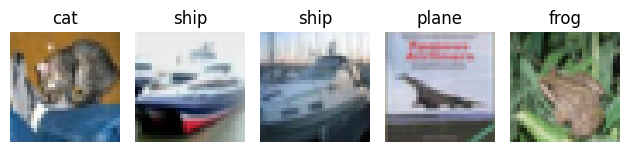

In [ ]:
###Display a grid of sample images with their corresponding labels

# Types of Classes in chronological order
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Convert one-hot encoded labels back to integers (instead of looking like this [0,0,0,0,0, 1, 0,0,0,0])
y_test_original = np.argmax(y_test, axis=1)

# Select a few test images
num_images = 5
sample_images = x_test[:num_images]
sample_labels = y_test_original[:num_images]

# function for plattion images with their corresponding labels
def plot_samples(x, y, index):
    plt.subplot(1, num_images, index + 1)
    plt.imshow(x[index])
    plt.title(class_names[y[index]])
    plt.axis('off')

#show first 5 images
for i in range(num_images):
    plot_samples(sample_images, sample_labels, i)

plt.tight_layout()
plt.show()

#Step 4: Design the CNN Architecture (25 points)


In [ ]:
#initialize model & add hidden layers
model = keras.Sequential()
model.add(Input(shape=input_shape)) #input_shape = (32, 32, 3)
#model.add(data_augmentation) # I decided not to data augment because my the model accuracy seems to get worse. *IDKY*
#conulation layer that gives us the acutal parameter weights. Use "relu" activiation function because it is cheap/copmutationally in-expensive
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu")) #32 matricies, 3x3 in size
#pooling layer - basic logic to help reduce the # of units
model.add(MaxPooling2D(pool_size=(2, 2)))
#another layer (trying to stack layer aka deep learning)
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
#another layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# we stack it/flatten it from a 4d matrix to a 2d matrix
model.add(Flatten())

# Output(Dense) Layers
model.add(Dense(64, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

#forget __% (necessary to reduce overfitting) - save compute power &
##we're basically making the model more fuzzy to increase accuracy so it's not too picky
#model.add(Dropout(0.15))    ## Generally avoid using dropout in your ML model when working with convolutional neural networks (CNN), or with a small dataset

#compile model
model.compile(loss="categorical_crossentropy", #meaning we will have multiple outputs
              # can use "sparse_categorical_crossentropy" if you are too lazy to one-hot encode
              optimizer="adam", #uses stochastic gradient descent @ learning_rate = 0.001 automatically (you can change the learning rate if you want)
              metrics=["accuracy"]) #tracking for accuracy

#prints out layers in terminal
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

#Step 5: Train the Model (15 points)


Implement callbacks such as ModelCheckpoint

In [ ]:
# ModelCheckpoint callback
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from google.colab import drive
drive.mount('/content/drive')
checkpoint_filepath = "content/drive/MyDrive/Saved_CSV/checkpoint.weights.h5"
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


and EarlyStopping

In [ ]:
#stops the code early if metrics show the learning is not significant enough. the min_delta arg can do that
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

and a CSV Logger(if you need it)

In [ ]:
#gives a log of [epoch, acc, loss, val_acc, val_loss]
csv_logger = CSVLogger('model_log.csv', append=False, separator=',')

In [ ]:
#assign a variable with all callbacks (to be used in the model.fit function below)
callbacks_list = [model_checkpoint_callback, early_stopping, csv_logger]

Train the model with validation split


In [ ]:
num_epochs = 10
num_batch_size = 128
hist = model.fit(x_train, y_train, batch_size=num_batch_size,  #it'll take 128 pictures, line them all up, then rotate & multiply
          epochs=num_epochs, #run throught the entire dataset 10 times (more epochs = more accurate)
          validation_split=0.1, #automatically split data up into a training set and a validation set. meaning 10% of the data will be held out for this validation
          callbacks = callbacks_list) #add the callback


Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 61s 164ms/step - accuracy: 0.3169 - loss: 1.8643 - val_accuracy: 0.5118 - val_loss: 1.3686
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 75s 145ms/step - accuracy: 0.5321 - loss: 1.3235 - val_accuracy: 0.5628 - val_loss: 1.2205
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 82s 144ms/step - accuracy: 0.5911 - loss: 1.1664 - val_accuracy: 0.6264 - val_loss: 1.0789
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 83s 146ms/step - accuracy: 0.6381 - loss: 1.0533 - val_accuracy: 0.6372 - val_loss: 1.0400
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 83s 149ms/step - accuracy: 0.6594 - loss: 0.9841 - val_accuracy: 0.6572 - val_loss: 0.9885
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 81s 145ms/step - accuracy: 0.6766 - loss: 0.9361 - val_accuracy: 0.6696 - val_loss: 0.9637
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 81s 143ms/step - accuracy: 0.6938 - loss: 0.8836 - val_accuracy: 0.6662 - val_loss: 0.9611
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 52s 148ms/step - accuracy: 0.7105 - loss: 0

In [ ]:
#collect & create variables for each type of data
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

xc=range(len(train_acc)) #take the length of train_acc and not num_epochs incase it uses early_stopping


Plot the training and validation **Accuracy** over epochs

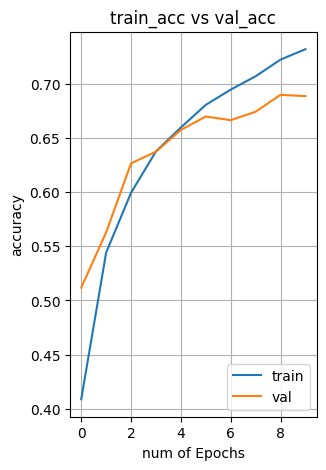

In [ ]:
#Plot Training & Validation Accuracy
plt.figure(1, figsize=(7,5))
plt.subplot(1, 2, 1)
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
# # print(plt.style.available) # use bmh, classic,ggplot for big pictures
# plt.style.use(['classic'])


plt.show()

Plot the training and validation  **Loss** over epochs

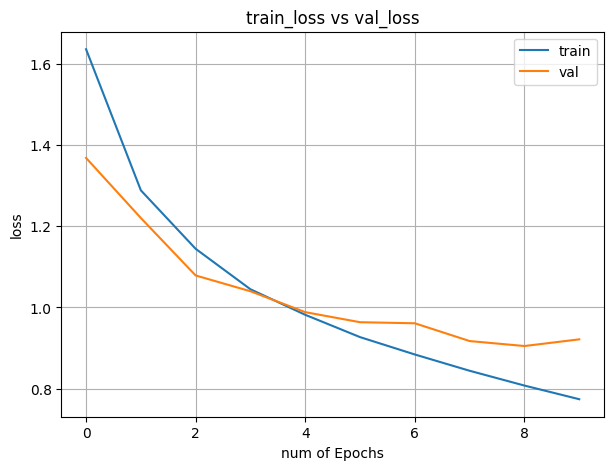

In [ ]:
#Plot Training & Validation Loss
plt.figure(1, figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
# # print(plt.style.available) # use bmh, classic,ggplot for big pictures
# plt.style.use(['classic'])


#Step 6: Evaluate the Model (10 points)  


Evaluate the model on the test set & Display the test accuracy and loss

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test loss:", test_loss)
print("Test accuracy w/ Data Augmentation:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6746 - loss: 0.9547
Test loss: 0.9659463763237
Test accuracy w/ Data Augmentation: 0.6735000014305115


Creating and generating a **Classification Report**

In [ ]:
#sklearn.metrics is needed for confusion_matrix and classification_report
from sklearn.metrics import classification_report

# Predict the labels of the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
classification_report = classification_report(y_test_original, y_pred_classes)

#generate the classification report
print("classification Report: \n", classification_report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.61      0.69      1000
           1       0.91      0.65      0.76      1000
           2       0.58      0.55      0.56      1000
           3       0.54      0.47      0.50      1000
           4       0.53      0.73      0.61      1000
           5       0.60      0.60      0.60      1000
           6       0.71      0.81      0.75      1000
           7       0.73      0.74      0.74      1000
           8       0.69      0.85      0.76      1000
           9       0.78      0.72      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000



Creating and generating a **Confusion Matrix**

<Figure size 3000x3000 with 0 Axes>

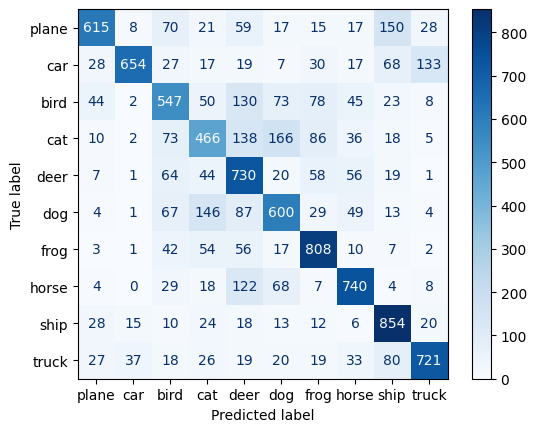

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusition_matrix = confusion_matrix(y_test_original, y_pred_classes)

conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusition_matrix, display_labels=class_names)
plt.figure(1, figsize=(30,30))
conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.show()

#Step 7: Make Predictions (10 points)  


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


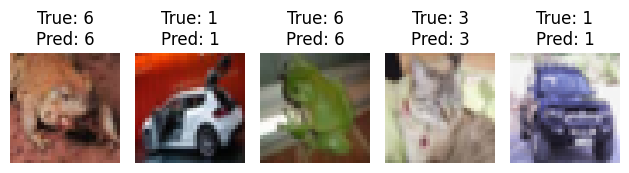

In [ ]:
# Select a few test images
new_num_images = 5
new_sample_images = x_test[5:(5 + num_images)]
new_sample_labels = y_test_original[5:(5 + num_images)]

# Predict the labels of the selected images
predicted_labels = model.predict(new_sample_images).argmax(axis=1)

# Display images with predicted and actual labels
for i in range(new_num_images):   # number of images = num_images = 5
    plot_samples(new_sample_images, new_sample_labels, i)
    plt.title(f"True: {new_sample_labels[i]}\nPred: {predicted_labels[i]}")

plt.tight_layout()
plt.show()

#Step 8: Analysis and Reflection (20 points)  


##Discuss the performance of your model

According to https://code.google.com/archive/p/cuda-convnet/ 26% error on CIFAR-10 in 80 seconds is the fast result. Thus, I would say my result of 73.5% on th 10th epoch is satisfactory to me. I could probably still play around with the ordering and sizing of the layers, but after playing around with my data_augmentation and dropout rates, I have come up with good enough accuracy rates. In Step 7, I give the model 5 images and it correctly identifies all 5.

##Analyze any patterns in the mistakes made by the model

Some patterns I noticed was that the model tends to mistakes cats with dogs and vice versa (which can be seen in the confusion matrix). It also seems to have a tough time with birds. Whereas man-made objects come easier to the model, such as automobiles and airplanes.

 ## Suggest potential improvements to the architecture or training process

I ultimately decided to just give up on data augmenting. That would be the first place I would start, finding the optimal augmentation methods. Then I would probably see which dimensions are best for the dense layer. After, I might try higher computational equations like GELU or ELU instead of RELU. Of course, there is probably more improvements that can be made, but I do not know of them yet because I am still learning.

## Reflect on the challenges faced and lessons learned

The confusion matrix, callback, checkpoints, and early stopping capabilites were all new to me, so those were the main challenges I had to vercome by learning via Youtube. Then correctly implementing them into my code was also a challenge. Another decent challenge was learning how & where to filepath my checkpoints correctly. After some fails, I finally came to integrate my google drive with this notebook. But, the greatest challenge of all of attaining higher accuracy on my model.

# Bonus (Optional, up to 10 extra points):

*   Data augmentation has been implemented. (but i ultimately decided to still not use it) [+5 points]
*   

